In [15]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [8]:
data = pd.read_csv(r"heart-statlog.csv")

In [24]:
data.head(0)

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels,thal,class
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,present
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,absent
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,present
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,absent
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,absent
5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,absent
6,56,1,3,130,256,1,2,142,1,0.6,2,1,6,present
7,59,1,4,110,239,0,2,142,1,1.2,2,1,7,present
8,60,1,4,140,293,0,2,170,0,1.2,2,2,7,present
9,63,0,4,150,407,0,2,154,0,4.0,2,3,7,present


In [10]:
X = data.iloc[:,0:12]

In [11]:
X.head()

,age,sex,chest,resting_blood_pressure,serum_cholestoral,fasting_blood_sugar,resting_electrocardiographic_results,maximum_heart_rate_achieved,exercise_induced_angina,oldpeak,slope,number_of_major_vessels
0,70,1,4,130,322,0,2,109,0,2.4,2,3
1,67,0,3,115,564,0,2,160,0,1.6,2,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0
3,64,1,4,128,263,0,0,105,1,0.2,2,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1


In [12]:
y = data.iloc[:,-1]

In [13]:
y.head()

0    present
1     absent
2    present
3     absent
4     absent
Name: class, dtype: object

In [22]:
dfs = data[["serum_cholestoral", "age"]]

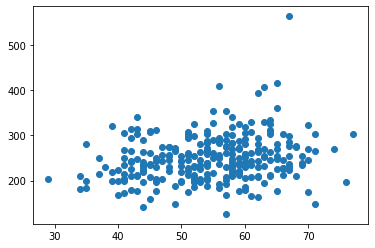

In [23]:
plt.scatter(dfs["age"], dfs["serum_cholestoral"])

In [60]:
knn = KNeighborsClassifier(n_neighbors=4)

In [61]:
data.shape

(270, 14)

In [62]:
import numpy as np

In [63]:
np.sqrt(270)

16.431676725154983

In [64]:
knn.fit(X,y)

KNeighborsClassifier(n_neighbors=4)

In [65]:
y_pred = knn.predict(X)

In [66]:
type(y)

pandas.core.series.Series

In [67]:
y.values

array(['present', 'absent', 'present', 'absent', 'absent', 'absent',
       'present', 'present', 'present', 'present', 'absent', 'absent',
       'absent', 'present', 'absent', 'absent', 'present', 'present',
       'absent', 'absent', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'absent', 'absent', 'present', 'absent',
       'present', 'absent', 'absent', 'present', 'present', 'present',
       'present', 'present', 'absent', 'absent', 'present', 'absent',
       'absent', 'absent', 'present', 'absent', 'present', 'present',
       'present', 'present', 'present', 'absent', 'absent', 'absent',
       'absent', 'absent', 'present', 'absent', 'present', 'present',
       'absent', 'present', 'absent', 'absent', 'absent', 'present',
       'absent', 'present', 'absent', 'present', 'present', 'absent',
       'absent', 'absent', 'absent', 'present', 'absent', 'absent',
       'absent', 'absent', 'present', 'present', 'present', 'absent',
       'absent', 'absent',

In [68]:
y_predict = pd.DataFrame(data = [y_pred,y.values] )

In [69]:
y_predict

,0,1,2,3,4,5,6,7,8,9,...,260,261,262,263,264,265,266,267,268,269
0,present,absent,present,present,absent,absent,present,absent,present,absent,...,absent,present,absent,absent,present,absent,absent,absent,absent,present
1,present,absent,present,absent,absent,absent,present,present,present,present,...,absent,present,present,absent,present,absent,absent,absent,absent,present


In [70]:
y_predict.transpose()

,0,1
0,present,present
1,absent,absent
2,present,present
3,present,absent
4,absent,absent
...,...,...
265,absent,absent
266,absent,absent
267,absent,absent
268,absent,absent


In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=2,random_state=1)

In [73]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [74]:
y_test_pred = knn.predict(X_test)

In [75]:
y_test_pred

array(['absent', 'present'], dtype=object)

In [76]:
y_test.values

array(['absent', 'present'], dtype=object)

In [77]:
prediction_output = pd.DataFrame(data = [y_test_pred,y_test.values])

In [78]:
prediction_output.transpose()

,0,1
0,absent,absent
1,present,present
